In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For animation
from IPython.display import display, clear_output


# Gradient descent exploration

Suppose we need to find solution to the regression (find some parameters for it). It can be computationaly expensive, so instead we define loss function and try to minimize loss function (loss function takes in same parameters as input). We can do it iteratively, jus by sampling values for it and randomly stumbling around (sample random value for each aparmeter and try try try). Or, if we know our loss function and can find derivatives for it with respect to the parameters, we can find the direction parrameters should be changed to minimize loss function

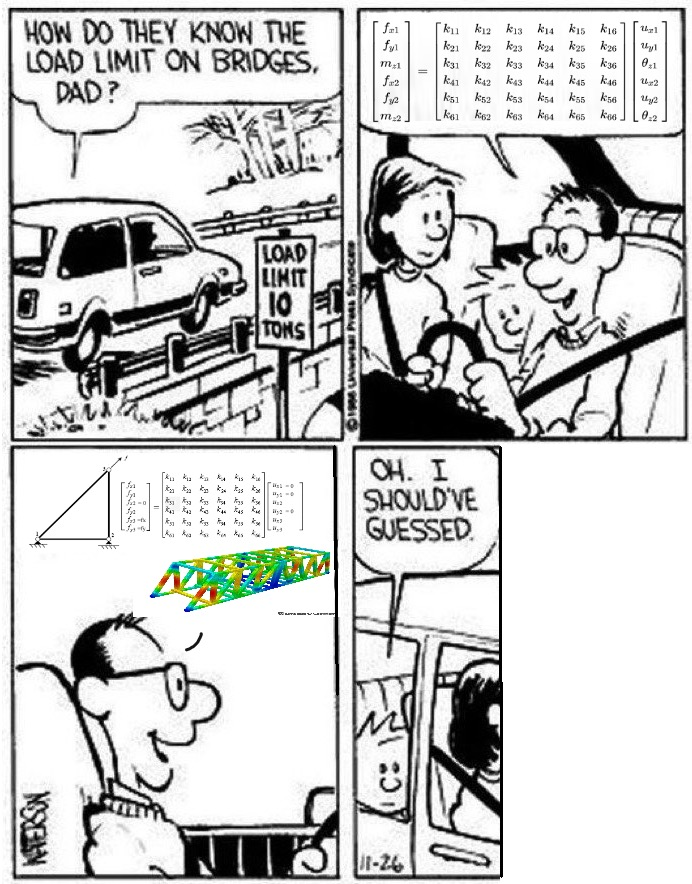

### Vanilla Gradient Descent

In [3]:
def gradient_descent_meta(data_x, data_y, iterations=500, learning_rate=0.05, tol=1e-2):
    """gradient_descent(data_x, data_y, iterations=1000, learning_rate=0.05) -> slope, intercept, mc, loss
    linear regression by using the gradient descent algorithm"""
    N = len(data_x)
    m, c = 0, 0  # initial values for m and c
    mc = []      # save the values of m and c for visualization only
    loss = []
    
    
    loss_c = tol + 1

    while loss_c > tol:
        # Compute the current error
        y = data_x * m + c      # predicted value
        error =  data_y - y     # vector of differences between predicted and actual
        loss_c = np.sum(error**2)/N
        loss.append (loss_c)
        
        # Compute the gradient using vectorized operations
        # minus cuz opposite of gradient NOOOOOOOOO!
        dm = -2/N * np.dot(error, data_x)
        dc = -2/N * np.sum(error)
        
        # dm = -1*0.1*np.dot(error, data_x)
        # dc = -1*0.1*np.sum(error)


        # Update m and c
        m = m - dm * learning_rate #NOOOWWW you take the negative gradient
        c = c - dc * learning_rate
        
        # Save the current values of m and c
        mc.append((m, c))

    return m, c, mc, loss

### Mini Batch

https://www.geeksforgeeks.org/machine-learning/different-variants-of-gradient-descent/

### Stochastic gradient descent

https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [4]:
def gradient_descent_stoch(data_x, data_y, iterations=500, learning_rate=0.05, tol=1e-2):
    """gradient_descent_stoch(data_x, data_y, iterations=500, learning_rate=0.05, tol=1e-3) -> slope, intercept, mc, loss
    linear regression by using the stochastic gradient descent algorithm"""
    N = len(data_x)
    m, c = 0, 0  # initial values for m and c
    mc = []      # save the values of m and c for visualization only
    loss = []
    loss_c = tol + 10
    
    while loss_c > tol:
        # Random sample selection
        idx = np.random.randint(0, N)
        
        # Compute prediction and error for single sample
        y_pred = data_x[idx] * m + c
        error = data_y[idx] - y_pred
        
        # Gradients for SGD (batch size = 1)
        dm = -2 * error * data_x[idx]
        dc = -2 * error
        
        # Update parameters
        m = m - dm * learning_rate
        c = c - dc * learning_rate
        
        # Compute loss over entire dataset for convergence check
        y_pred_all = data_x * m + c
        errors_all = data_y - y_pred_all
        loss_c = np.mean(errors_all**2)  # MSE over all samples
        loss.append(loss_c)
        
        mc.append((m, c))
    
    return m, c, mc, loss

## Simpel dataset exploration

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data with a linear relationship: y = 2.5x + 1.5 + noise
data_x = np.linspace(0, 10, 100)
true_slope = 2.5
true_intercept = 1.5
noise = np.random.normal(0, 1, 100)  # Add some noise
data_y = true_slope * data_x + true_intercept + noise

data_x = data_x/25
data_y=data_y/25

Slope (m): 1.715679627858246
Intercept (c): 0.21482457896856344


Text(0, 0.5, 'Loss')

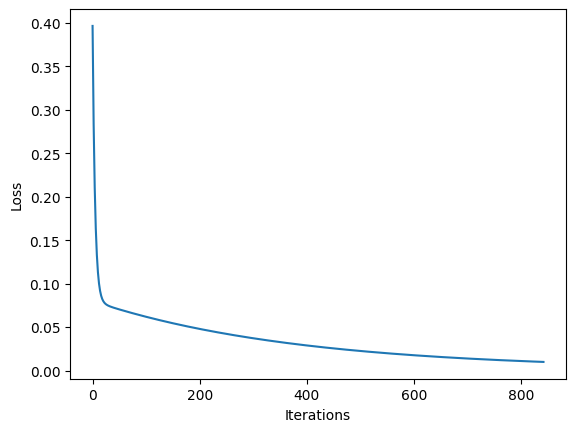

In [6]:
slope, intercept,mc,loss = gradient_descent_meta(data_x, data_y)
print("Slope (m):", slope)
print("Intercept (c):", intercept)
# The loss is decreasing with the number of iterations

plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")



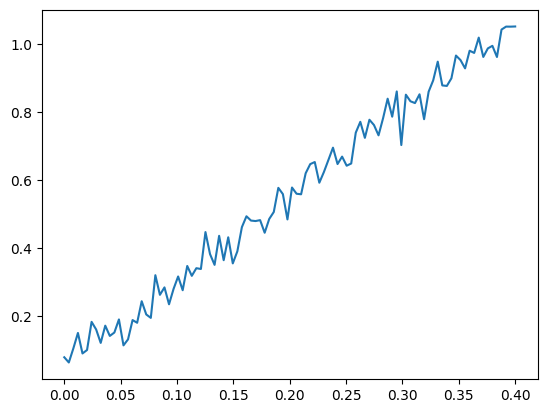

In [7]:
# The loss is decreasing with the number of iterations
plt.plot(data_x,data_y)

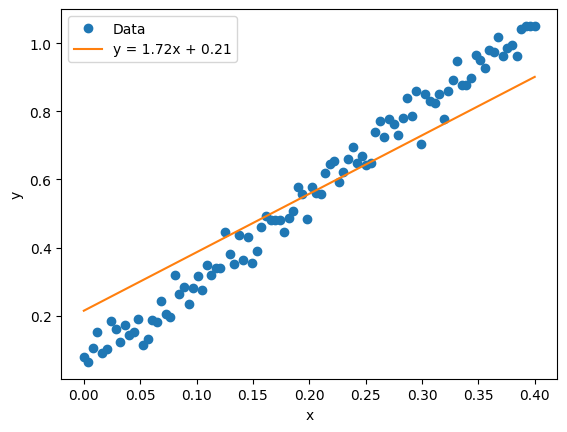

In [8]:
# Plot the original data points
plt.plot(data_x, data_y, 'o', label='Data')  # 'o' for scatter points

# Plot the regression line y = mx + c
y_pred = slope * data_x + intercept
plt.plot(data_x, y_pred, '-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Stoch dataset exploration

In [9]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data with a linear relationship: y = 2.5x + 1.5 + noise
data_x = np.linspace(0, 10, 1000000)
true_slope = 2.5
true_intercept = 1.5
noise = np.random.normal(0, 1, 1000000)  # Add some noise
data_y = true_slope * data_x + true_intercept + noise

data_x = data_x/25
data_y=data_y/25

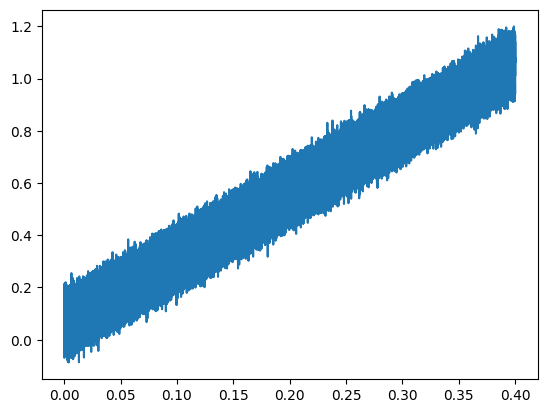

In [10]:
# The loss is decreasing with the number of iterations

plt.plot(data_x,data_y)

In [12]:
slope, intercept,mc,loss = gradient_descent_meta(data_x, data_y)

KeyboardInterrupt: 

In [13]:
slope, intercept,mc,loss = gradient_descent_stoch(data_x, data_y)
print("Slope (m):", slope)
print("Intercept (c):", intercept)

Slope (m): 1.7090375893284724
Intercept (c): 0.22454127142018024


Text(0, 0.5, 'Loss')

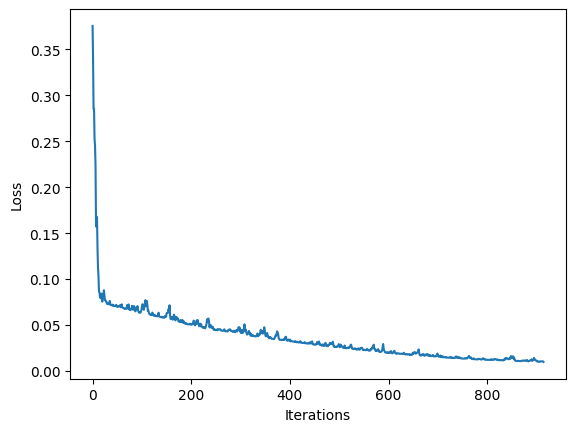

In [14]:
# The loss is decreasing with the number of iterations

plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")


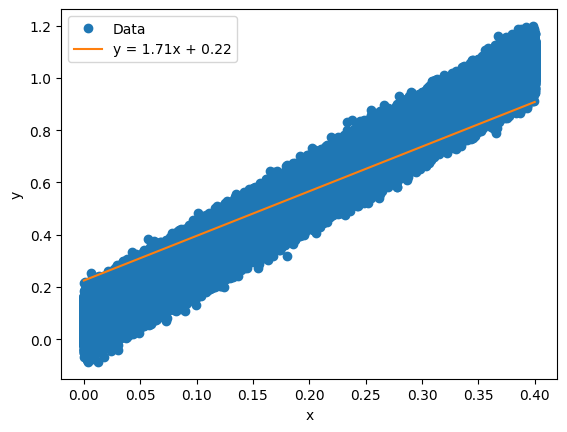

In [15]:
# Plot the original data points
plt.plot(data_x, data_y, 'o', label='Data')  # 'o' for scatter points

# Plot the regression line y = mx + c
y_pred = slope * data_x + intercept
plt.plot(data_x, y_pred, '-', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()